# Benchmark Usage


1. [Create Object **BenchmarkHandler** to access the data](#first-bullet)
2. [List the search spaces](#second-bullet)
3. [Get the search space values](#third-bullet)
4. [Get environments](#fourth-bullet)
5. [Set the environment and search space you want to query](#fifth-bullet)
6. [Query the already-set search space, environment and seed for a given budget and configuration](#sixth-bullet)
7. [Query a subset of metrics](#seventh-bullet)
8. [Create a BenchmarkHandler with customized settings](#eight-bullet)
9. [Create a BenchmarkHandler with customized settings (dynamic)](#nineth-bullet)

<a class="anchor" id="first-bullet"></a>

### 1) Create Object **BenchmarkHandler** to access the data:

In [1]:
from benchmark_handler import BenchmarkHandler

In [2]:
data_path = ""
benchmark = BenchmarkHandler(data_path=data_path)

<a class="anchor" id="second-bullet"></a>

### 2) List the search spaces:

In [3]:
benchmark.get_search_spaces_names(static=True)

['PPO', 'A2C', 'DDPG']

In [4]:
benchmark.get_search_spaces_names(static=False)

['PPO']

<a class="anchor" id="third-bullet"></a>

### 3) Get the search space values:

In [5]:
benchmark.get_search_space("PPO")

{'lr': [-6, -5, -4, -3, -2, -1],
 'gamma': [0.8, 0.9, 0.95, 0.98, 0.99, 1.0],
 'clip': [0.2, 0.3, 0.4]}

<a class="anchor" id="fourth-bullet"></a>

### 4) Get environments:

The environments are contained in three groups. You can list the groups: 

In [6]:
benchmark.get_environments_groups()

['Atari', 'Mujoco', 'Control']

You can list the environments of a specific group

In [7]:
benchmark.get_environments_per_group("Atari")

['Pong-v0',
 'Alien-v0',
 'BankHeist-v0',
 'BeamRider-v0',
 'Breakout-v0',
 'Enduro-v0',
 'Phoenix-v0',
 'Seaquest-v0',
 'SpaceInvaders-v0',
 'Riverraid-v0',
 'Tennis-v0',
 'Skiing-v0',
 'Boxing-v0',
 'Bowling-v0',
 'Asteroids-v0']

You can list all the environments:

In [8]:
benchmark.get_environments()

['Pong-v0',
 'Ant-v2',
 'Alien-v0',
 'BankHeist-v0',
 'BeamRider-v0',
 'Breakout-v0',
 'Enduro-v0',
 'Phoenix-v0',
 'Seaquest-v0',
 'SpaceInvaders-v0',
 'Riverraid-v0',
 'Tennis-v0',
 'Skiing-v0',
 'Boxing-v0',
 'Bowling-v0',
 'Asteroids-v0',
 'Hopper-v2',
 'Humanoid-v2',
 'CartPole-v1',
 'MountainCar-v0',
 'Acrobot-v1',
 'Pendulum-v0']

<a class="anchor" id="fifth-bullet"></a>

### 5) Set the environment, search space and seed you want to query:

In [9]:
benchmark.set_env_space_seed(search_space="PPO", environment="Pong-v0", seed= 0)

<a class="anchor" id="sixth-bullet"></a>

###  6) Query the already-set search space and environement for a given budget and configuration:

In [10]:
configuration = {"lr":-6, "gamma": 0.8, "clip": 0.2}
budget = 50
queried_data = benchmark.get_metrics(configuration, budget=budget)

In [11]:
queried_data.keys()

dict_keys(['returns_eval', 'std_returns_eval', 'timestamps_eval', 'timesteps_eval', 'timesteps_train', 'timestamps_train', 'returns_train'])

<a class="anchor" id="seventh-bullet"></a>

### 7) Query a subset of metrics

As you can see, the default functionality returns all the metrics. You can change the value of the attritbute "return_names" of a benchmark object and define the specific metrics you want.

In [12]:
benchmark.return_names = ["returns_eval", "timesteps_eval"]
configuration = {"lr":-6, "gamma": 0.8, "clip": 0.2}
budget = 50
queried_data = benchmark.get_metrics(configuration, budget=budget)
queried_data.keys()

dict_keys(['returns_eval', 'timesteps_eval'])

<a class="anchor" id="eight-bullet"></a>

### 8) Create a BenchmarkHandler with customized settings (static)

It is possible to define the environment, space and return metrics when creating the benchmark object:

In [13]:
import matplotlib.pyplot as plt

benchmark = BenchmarkHandler(data_path=data_path,
                             environment = "Pong-v0",
                             search_space = "PPO",
                             return_names = ["returns_train", "timesteps_train"],
                             seed = 0)
queried_data = benchmark.get_metrics(configuration, budget=budget)


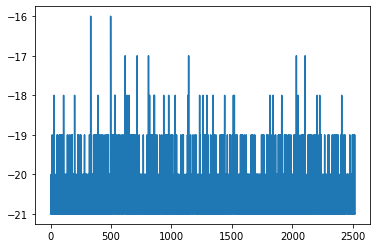

In [14]:
plt.plot(queried_data["returns_train"])

<a class="anchor" id="nineth-bullet"></a>

### 9) Create a BenchmarkHandler with customized settings (dynamic)



In [22]:
benchmark.set_env_space_seed(search_space="PPO", environment="Enduro-v0", seed= 0)

benchmark.static = False
configuration = {"lr":[-5, -4], "gamma": [0.98,0.99]}
queried_data = benchmark.get_metrics(configuration, budget=budget)


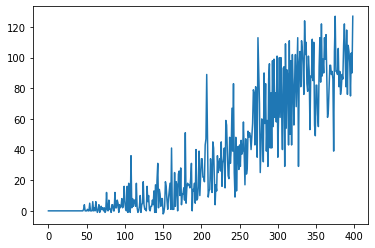

In [23]:
plt.plot(queried_data["returns_train"])